KNN Test Accuracy: 0.8350

Blockchain Logs:
{'data': 'Legitimate network packet received on 2025-01-23', 'prev_hash': '0000000000000000000000000000000000000000000000000000000000000000', 'hash': '1ffe6fdc0f03629453d2b109b1282aabc065ea02023c03a9f9b67f1c128f2811'}
{'data': 'Malicious packet detected and blocked on 2025-01-23', 'prev_hash': '1ffe6fdc0f03629453d2b109b1282aabc065ea02023c03a9f9b67f1c128f2811', 'hash': 'a7370f7ba4254da63753be03b3c17f67b82a5fac60d1b7b5eca04b5b5ccb128e'}
{'data': 'Firewall rules updated on 2025-01-23', 'prev_hash': 'a7370f7ba4254da63753be03b3c17f67b82a5fac60d1b7b5eca04b5b5ccb128e', 'hash': '4516ae0706094b9540cb989bd42cdca03878d3daeb943b0eee55e369f8d42be0'}
{'data': 'Malicious packet detected on 2025-01-23', 'prev_hash': '4516ae0706094b9540cb989bd42cdca03878d3daeb943b0eee55e369f8d42be0', 'hash': '226e5ea91ca9e08bf48ec884cb8aa41380b7ca854fb64cf74c0dec85e3e4f902'}


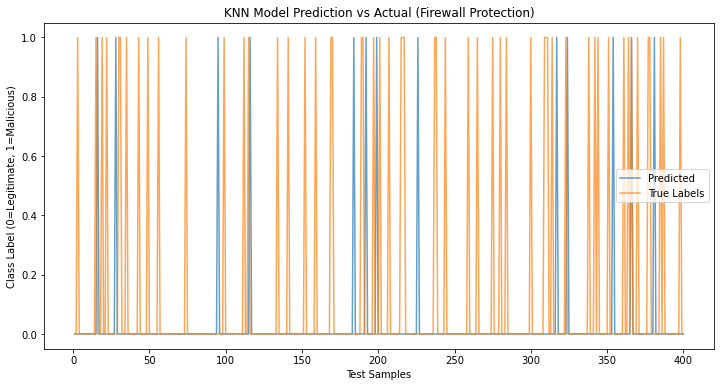

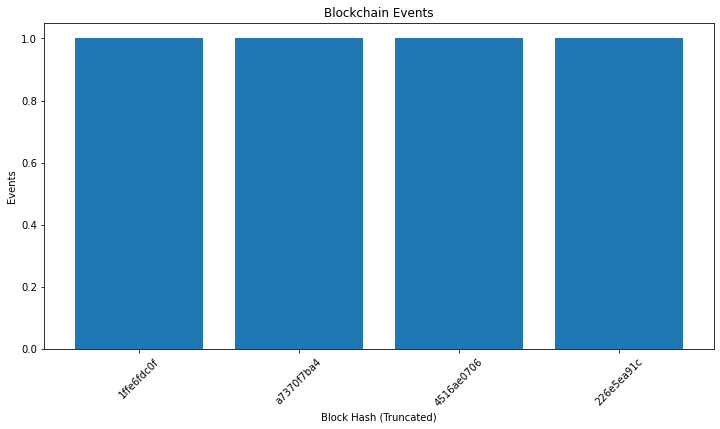


KNN Classification Report:
              precision    recall  f1-score   support

  legitimate       0.86      0.97      0.91       345
   malicious       0.08      0.02      0.03        55

    accuracy                           0.83       400
   macro avg       0.47      0.49      0.47       400
weighted avg       0.75      0.83      0.79       400



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from hashlib import sha256

# Step 1: Simulate Firewall Traffic Dataset
np.random.seed(42)

n_samples = 2000
n_features = 12  # Features could represent packet size, source/destination IP, protocol, etc.

# Simulate network traffic features
X = np.random.rand(n_samples, n_features) * 1000  # Random traffic features like packet size, time, etc.
y = np.random.choice(['legitimate', 'malicious'], size=n_samples, p=[0.85, 0.15])  # Imbalanced classes

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 0 for legitimate, 1 for malicious

# Step 2: Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 3: Build and Train KNN Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Test Accuracy: {knn_accuracy:.4f}")

# Step 4: Blockchain Logging
blockchain_log = []

def log_to_blockchain(event):
    """Log events to a simple blockchain."""
    if blockchain_log:
        prev_hash = blockchain_log[-1]['hash']
    else:
        prev_hash = "0" * 64
    block = {
        'data': event,
        'prev_hash': prev_hash,
        'hash': sha256((event + prev_hash).encode()).hexdigest()
    }
    blockchain_log.append(block)

# Log network events
log_to_blockchain("Legitimate network packet received on 2025-01-23")
log_to_blockchain("Malicious packet detected and blocked on 2025-01-23")
log_to_blockchain("Firewall rules updated on 2025-01-23")
log_to_blockchain("Malicious packet detected on 2025-01-23")

# Display Blockchain Logs
print("\nBlockchain Logs:")
for block in blockchain_log:
    print(block)

# Step 5: Visualize KNN Model Performance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_pred)+1), y_pred, label="Predicted", alpha=0.7)
plt.plot(range(1, len(y_test)+1), y_test, label="True Labels", alpha=0.7)
plt.title('KNN Model Prediction vs Actual (Firewall Protection)')
plt.xlabel('Test Samples')
plt.ylabel('Class Label (0=Legitimate, 1=Malicious)')
plt.legend()
plt.show()

# Step 6: Visualize Blockchain Events
plt.figure(figsize=(12, 6))
block_data = [block['data'] for block in blockchain_log]
block_hashes = [block['hash'][:10] for block in blockchain_log]  # Display truncated hash
plt.bar(range(len(block_data)), [1] * len(block_data), tick_label=block_hashes)
plt.title("Blockchain Events")
plt.ylabel("Events")
plt.xlabel("Block Hash (Truncated)")
plt.xticks(rotation=45)
plt.show()

# Step 7: Evaluate KNN Model
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
